# Notebooks Imports and packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
     return x**2 + x + 1

In [5]:
#Make data

x_1 = np.linspace(start = -3, stop = 3,num=500)

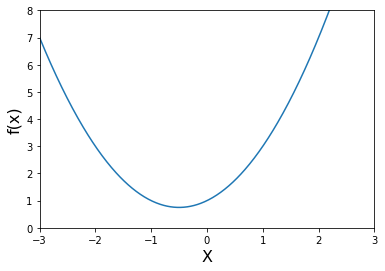

In [17]:
#Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel("X",fontsize=16)
plt.ylabel("f(x)",fontsize=16)
plt.plot(x_1,f(x_1))
plt.show()

## Slope & Derivatives
Challange:- Create a python function for the derivative of $f(x)$ called $df(x)$

In [18]:
def df(x):
    return 2*x + 1

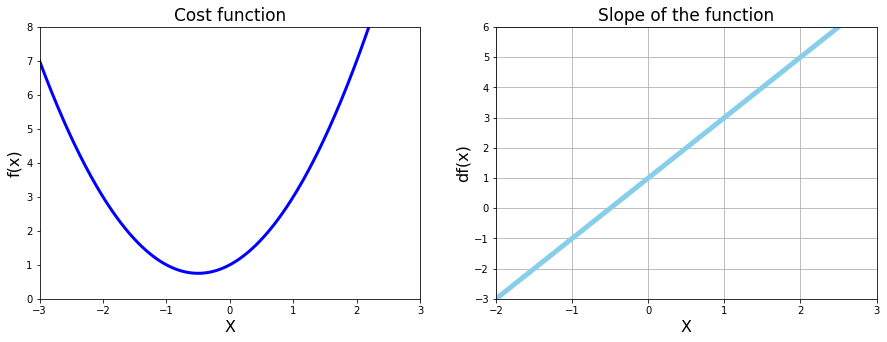

In [42]:
#Plot function and derivative side by side

plt.figure(figsize=[15,5])

# 1 Chart: cost function 
plt.subplot(1,2,1)



plt.xlim([-3,3])
plt.ylim(0,8)
plt.title("Cost function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("f(x)",fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

#2 Chart: Derivative
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.title("Slope of the function",fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("df(x)",fontsize=16)
plt.grid()
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)




plt.show()